# Imports

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from scipy.interpolate import interp1d
from sklearn import linear_model as lm
#import scikitplot as skplt



# Load Dataset

In [4]:
df_raw = pd.read_csv('data_health/train.csv')

In [5]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Data Description

In [6]:
df1 = df_raw.copy()
df1.columns = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## Data Dimension

In [7]:
print('Nums of rows: {}'.format(df1.shape[0]))
print('Nums of colums: {}'.format(df1.shape[1]))


Nums of rows: 381109
Nums of colums: 12


## Data Types

In [8]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## Check NA

In [9]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## Data Description

In [10]:
df1.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Feature Engineering

In [11]:
df2 = df1.copy()

In [12]:
# Vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year')

In [13]:
# Vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].map({'Yes':1, 'No':0})

## Data Filtering

In [14]:
df3 = df2.copy()

In [15]:
df3.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## EDA

<Axes: xlabel='response', ylabel='age'>

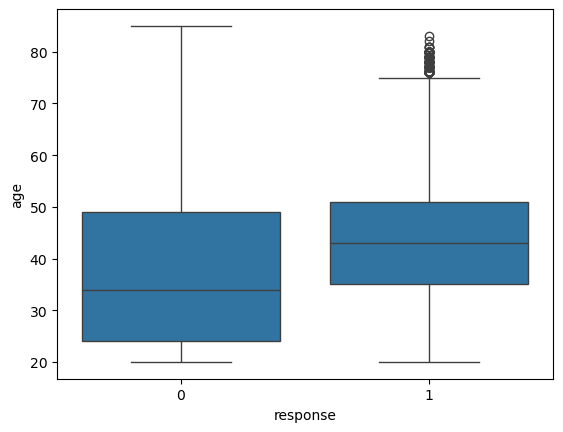

In [16]:
# age
sns.boxplot(x='response', y='age', data=df3)

<Axes: title={'center': 'Not Interested'}, xlabel='age', ylabel='Count'>

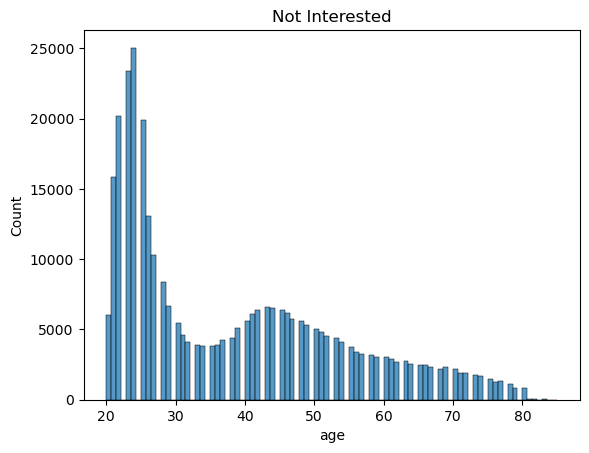

In [17]:
aux00 = df3.loc[df3['response'] == 0, 'age']
plt.title('Not Interested')
sns.histplot(aux00)


<Axes: title={'center': 'Interested'}, xlabel='age', ylabel='Count'>

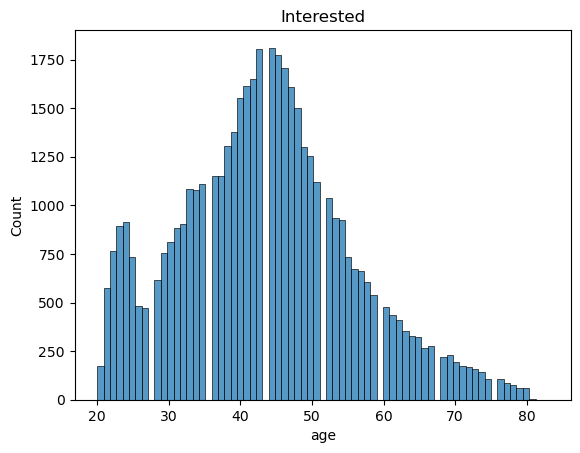

In [18]:
aux00 = df3.loc[df3['response'] == 1, 'age']
plt.title('Interested')
sns.histplot(aux00)

<Axes: xlabel='response', ylabel='annual_premium'>

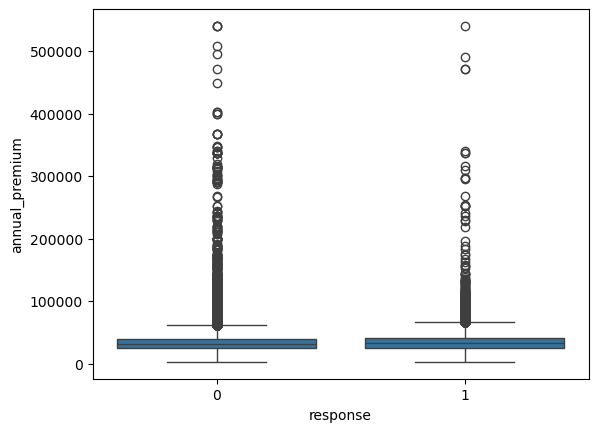

In [19]:
# Annual Premium
sns.boxplot(x='response', y='annual_premium', data=df3)

<Axes: title={'center': 'Not Interested'}, xlabel='annual_premium', ylabel='Count'>

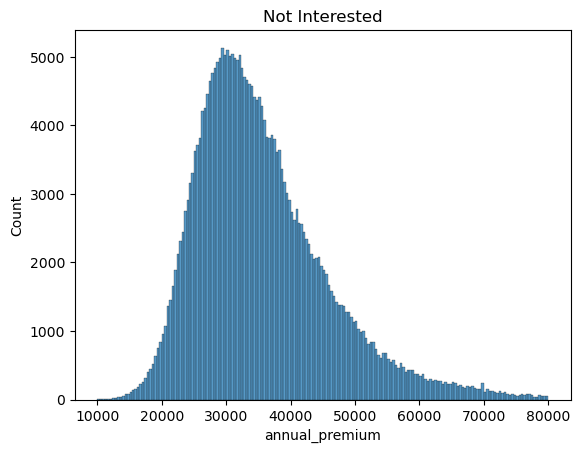

In [20]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
plt.title('Not Interested')
sns.histplot(aux00)


<Axes: title={'center': 'Interested'}, xlabel='annual_premium', ylabel='Count'>

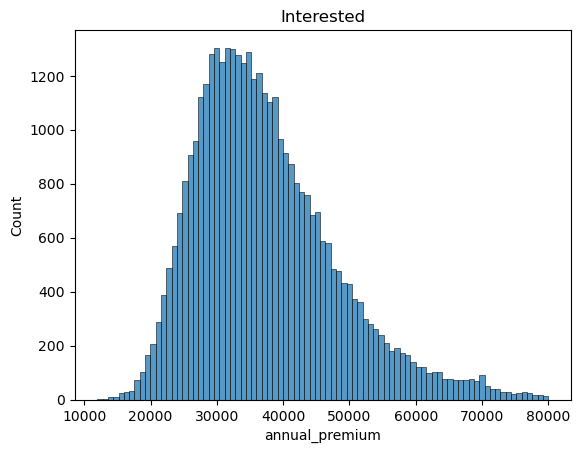

In [21]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
plt.title('Interested')
sns.histplot(aux00)

In [22]:
# Driving license
df3[['driving_license', 'response']].groupby('response').sum()

,driving_license
response,
0,333628
1,46669


<Axes: xlabel='region_code', ylabel='id'>

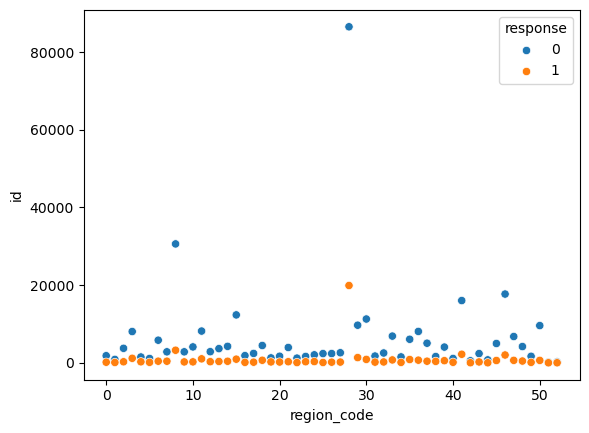

In [23]:
# Region Code
aux0 = df3[['id','region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()

sns.scatterplot(x='region_code', y='id', hue='response', data=aux0)

In [24]:
# Vehicle_age
df3[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()


,vehicle_age,response,proportion
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


<Axes: xlabel='response', ylabel='policy_sales_channel'>

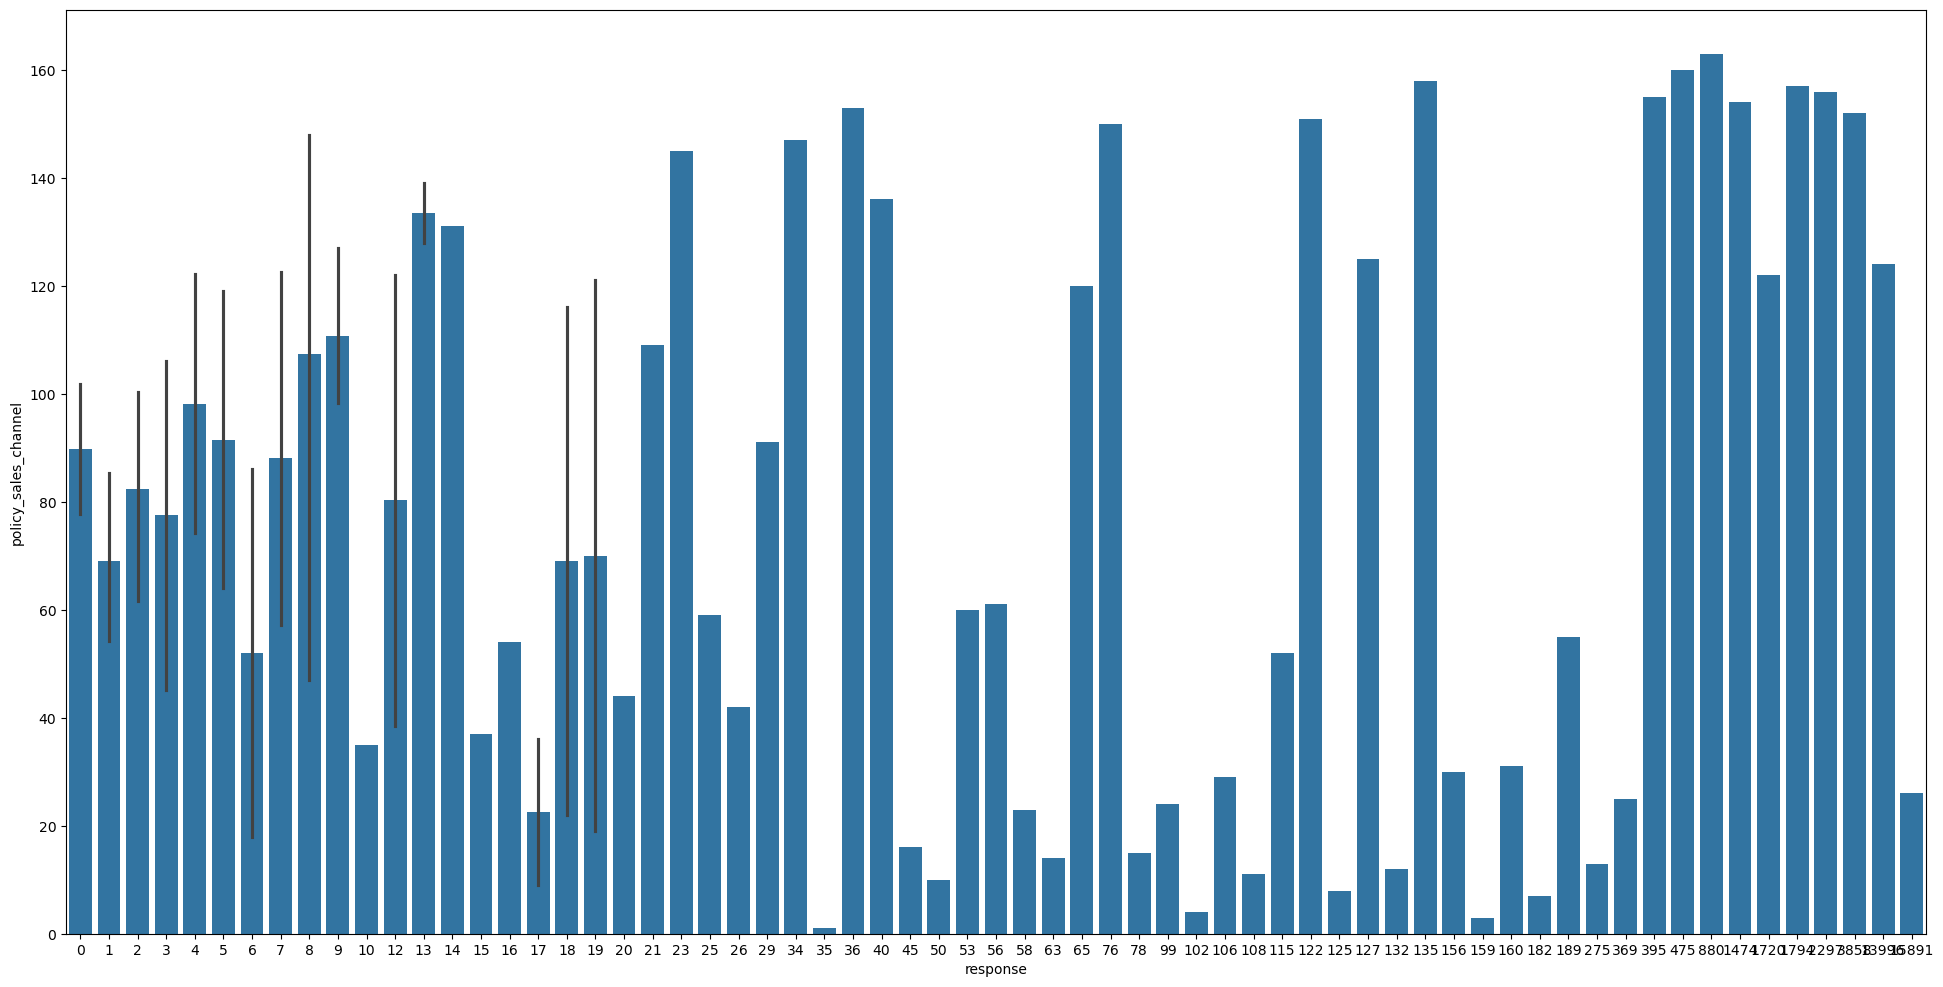

In [25]:
# policy_sales_channel
plt.figure(figsize=(24,12))
aux = df3[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux)

<Axes: xlabel='response', ylabel='vintage'>

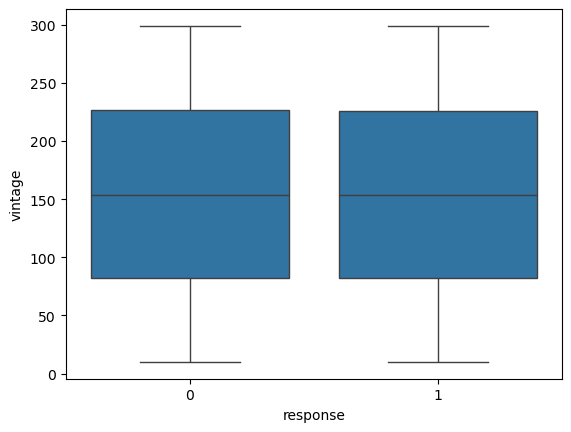

In [26]:
# vintage
sns.boxplot(x='response', y='vintage', data=df3)

<Axes: title={'center': 'Not Interested'}, xlabel='vintage', ylabel='Count'>

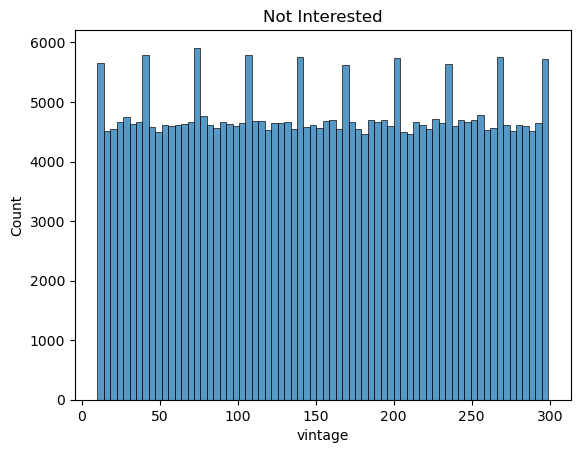

In [27]:
aux00 = df3.loc[df3['response'] == 0, 'vintage']
plt.title('Not Interested')
sns.histplot(aux00)


<Axes: title={'center': 'Interested'}, xlabel='vintage', ylabel='Count'>

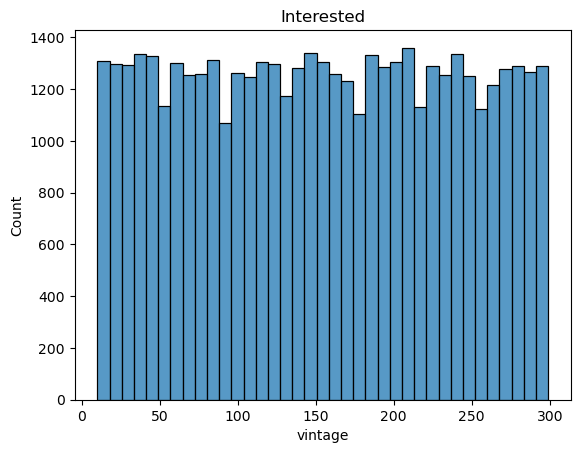

In [28]:
aux00 = df3.loc[df3['response'] == 1, 'vintage']
plt.title('Interested')
sns.histplot(aux00)


# Data Preparation

In [29]:
df5 = df3.copy()

In [30]:
X = df3.drop('response', axis=1)
y = df3['response']

x_train, x_validation, y_train, y_validation = ms.train_test_split(X, y, test_size=0.20)

df5 = pd.concat([x_train, y_train], axis=1)

## Standardization

In [31]:
ss = pp.StandardScaler()

df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

## Rescaling

In [32]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age
df5['age'] = mms_age.fit_transform(df5[['age']].values)

#vintage
df5['vintage'] = mms_age.fit_transform(df5[['vintage']].values)

## Encoder

In [33]:
# target encoding
target_encode_gender = df5.groupby('gender')['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map(target_encode_gender)

# target encoding
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encode_region_code)

#one hot encoding dummies
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])

#frequence encoding
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)


## Validation Preparation

In [34]:
# gender
x_validation.loc[:, 'gender'] = x_validation.loc[:, 'gender'].map( target_encode_gender )

# age
x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )

# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age
#x_val = pd.get_dummies( x_val, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[['annual_premium']].values )

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# vintage
#x_val.loc[:, 'vintage'] = mms_vintage.transform( x_val[['vintage']].values )

# fillna
x_validation = x_validation.fillna( 0 )


C:\Users\Luigi\AppData\Local\Temp\ipykernel_16904\313305346.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.18685121 0.05536332 0.03460208 ... 0.14878893 0.10726644 0.05190311]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )
C:\Users\Luigi\AppData\Local\Temp\ipykernel_16904\313305346.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_validation = x_validation.fillna( 0 )


# Feature Selection

## Feature importance

In [35]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n )


ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                        feature  importance
0                       vintage    0.271717
0                annual_premium    0.243887
0                           age    0.162748
0                   region_code    0.108358
0                vehicle_damage    0.069131
0          policy_sales_channel    0.060532
0            previously_insured    0.055313
0      vehicle_age_below_1_year    0.014152
0  vehicle_age_between_1_2_year    0.006146
0                        gender    0.005024
0      vehicle_age_over_2_years    0.002473
0               driving_license    0.000518


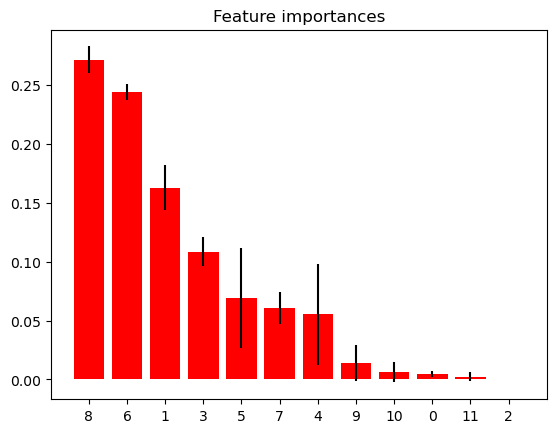

In [36]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( { 'feature': i, 'importance': j }, index=[0] )
    df = pd.concat( [df, aux], axis=0 )

print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()


# Machine Learning

In [37]:
cols_selected = ['vintage', 'annual_premium', 'age', 'region_code', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

x_train = df5[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()

## KNN

In [38]:
knn_model = nh.KNeighborsClassifier(n_neighbors=2)

knn_model.fit(x_train, y_train)

yhat_knn = knn_model.predict_proba(x_val)

In [39]:
lr_model = lm.LogisticRegression(random_state=42)

lr_model.fit(x_train, y_train)

yhat_lr = lr_model.predict_proba(x_val)

In [40]:
yhat_lr

array([[9.97950886e-01, 2.04911433e-03],
       [9.99752894e-01, 2.47105849e-04],
       [9.99652485e-01, 3.47514652e-04],
       ...,
       [9.99885298e-01, 1.14702005e-04],
       [8.73487195e-01, 1.26512805e-01],
       [9.99675466e-01, 3.24534157e-04]])

skplt
Ex: porcentagem de usuarios da base (fazer contato) para alcançar o 'maximo' de possiveis assinantes.
Quanto menor a qunatidade de pessoas para fazer contato (x) para alcançar o maximo de possiveis assinantes (y) melhor!

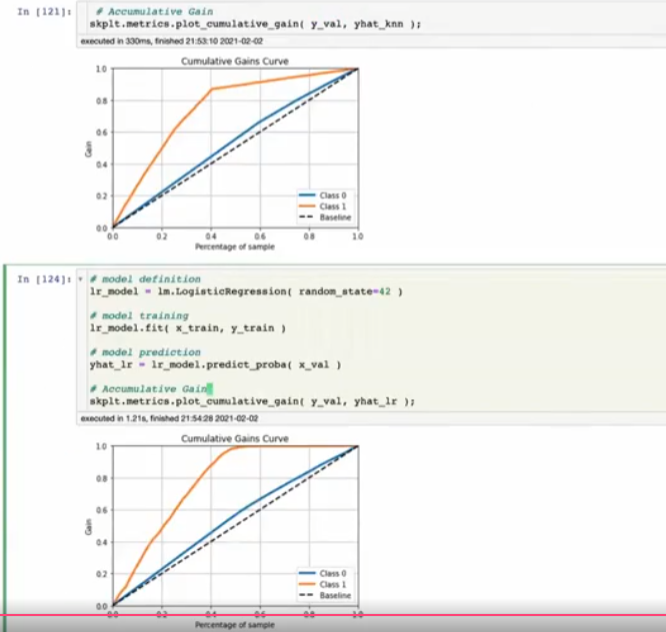

## Extra Trees

In [41]:
# model definition
et = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
# model fit
et.fit(x_train, y_train)
# model predict
et.predict_proba(x_val)

array([[0.948, 0.052],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [0.999, 0.001],
       [0.592, 0.408],
       [0.998, 0.002]])

# Model Performance

In [59]:
def precision_at_k(data, k=2000):
    # reset index
    data = data.reset_index(drop=True)

    # create ranking order
    data['ranking'] = data.index + 1

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']


In [62]:
def recall_at_k(data, k=2000):
    # reset index
    data = data.reset_index(drop=True)

    # create ranking order
    data['ranking'] = data.index + 1

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']


In [42]:
df8 = x_validation.copy()
df8['response'] = y_validation.copy()
df8.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
280588,280589,0.103749,0.186851,1,0.094690,1,between_1_2_year,1,-1.620887,0.003729,200,0
94695,94696,0.103749,0.055363,1,0.124674,1,below_1_year,0,-0.336803,0.353698,179,0
284736,284737,0.103749,0.034602,1,0.113614,1,below_1_year,0,-1.620887,0.057323,148,0
227907,227908,0.103749,0.093426,1,0.187296,1,between_1_2_year,0,-1.620887,0.028053,16,0
44116,44117,0.138730,0.093426,1,0.099739,0,between_1_2_year,1,-1.620887,0.015560,80,0


In [47]:
df8['score'] = yhat_knn[:,1].tolist()

In [60]:
df8 = df8.sort_values('score', ascending=False)

# compute precision at K
precision_at_50 = precision_at_k(df8, k=50)

In [61]:
precision_at_50

0.3333333333333333

In [64]:
recall_at_50 = recall_at_k(df8, k=50)
recall_at_50

0.001826385904598195